# **Deep Learning Homework 1: *from the Perceptron to Deep Neural Network***
### MSc Computer Science, Data Science, Cybersecurity @UNIPD
### 2nd semester - 6 ECTS
### Prof. Alessandro Sperduti, Prof. Nicolò Navarin and Dr. Luca Pasa
---

In this first homework, we are going to write our own simple feedforward neural network using `Python` and `NumPy` (the standard numeric library for Python). We will start by implementing just a simple neuron, or perceptron, then we define the training algorithm for this simple model.
The second part consists in defining a simple neural network to perform classification and regression in real-world cases.

## **Important Instructions for Submissions**

Generally, in the homeworks, you will be either required to complete a part of Python code or to answer questions in text cells. Code and text cells where you are expected to write your answers have been marked by `%STARTCODE` and `%ENDCODE` or `%STARTEXT` and `%ENDTEXT` tags, respectively. Note that you should never change, move or remove these two tags, otherwise your answers will be __not__ valid. As you will see in this notebook, each cell that includes a `[TO COMPLETE]` part has been put between these placeholders.

As an example, if the task is to _"define a variable named `x` and assign it to number 2"_, the following answer style is presented:

`%STARTCODE`

In [ ]:
x = 2 # [TO COMPLETE]

`%ENDCODE`

Similarly, if the task is a question-answering one, the same style is used. As an instance, the proper answer to the question "How can we import the numpy library in python?", must seem like the following:

`%STARTEXT`

Answer: **[TO COMLPETE]**

In order to do so, we use the keyword `import`, accompanied by the name of the library we would like to add to our notebook.

`%ENDTEXT`

As already mentioned, all `%START` and `%END` keywords have already been placed and you just need to be careful not to delete, move or change them. Now let's start with the first homework!

## Exercise 1.1: Perceptron

In this first exercise, we will implement a simple neuron, or perceptron, as described below. We will have just three inputs and one output neuron (we omit the bias term for now).
Notice how the perceptron simply performs a sum of the individual inputs multiplied by the corresponding weights mapped through an activation function $\sigma(\cdot)$.  This can also be expressed as a dot product of the weight vector $\textbf{W}$ and the input vector $\textbf{x}$, thus: $$\hat{y}=\sigma(\textbf{W}^T \textbf{x})$$

We will begin by implementing the perceptron by using the [numpy](https://docs.scipy.org/doc/numpy/reference/) library:

In [ ]:
import numpy as np

### Training data

Let's consider a very simple dataset. The dataset is made of four input vectors $\textbf{x} \in \mathbb{R}^3$ and the corresponding desired target values $y$. In the table below, each row is a single sample; the first three columns are the input vector components, whereas the last column is the target output.

||Input $x_i$||Output $y$|
|:----:|:---:|:---:|---:|
| 1    | 1   | 0   | 1  |
| 1    | 0   | 0   | 1  |
| 0    | 1   | 0   | 0  |
| 0    | 0   | 0   | 0  |

Notice that our target outputs are equal to the first component of the input, therefore the task that the model should learn is very simple. We will see how the perceptron is able to learn that starting from this toy dataset.

Now let's define the `X` and `y` matrices:

In [ ]:
# Our input data is a matrix, each row is one input sample
X = np.array([[1,1,0],
              [1,0,0],
              [0,1,0],
              [0,0,0]])

# The target output is a column vector in 2-D array format (.T means transpose)
y = np.array([[1,1,0,0]]).T

print('X =', X)
print('y =', y)

X = [[1 1 0]
 [1 0 0]
 [0 1 0]
 [0 0 0]]
y = [[1]
 [1]
 [0]
 [0]]


### Activation function

As we said before, in order to define a perceptron we need to define the activation function $f(\cdot)$. There are many possibile activation function that can be used, let's plot some of the most common ones:




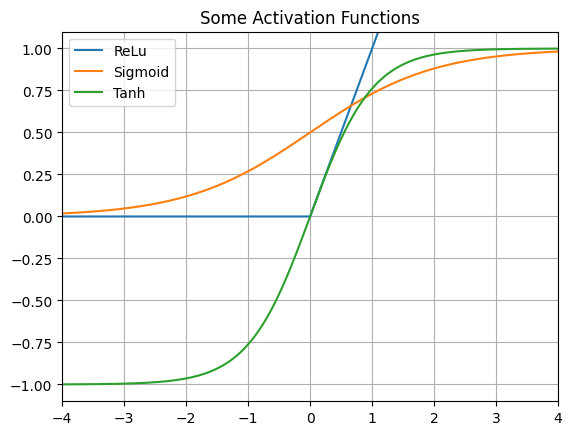

In [ ]:
import matplotlib.pyplot as plt

x_axis = np.arange(-4,4,.01)
plt.figure()
plt.plot(x_axis, np.maximum(x_axis,0), label='ReLu')
plt.plot(x_axis, 1/(1+np.exp(-x_axis)), label='Sigmoid')
plt.plot(x_axis, np.tanh(x_axis), label='Tanh')
plt.axis([-4, 4, -1.1, 1.1])
plt.title('Some Activation Functions')
plt.grid(True)
plt.legend()
plt.show()

In this particular exercise we will use the sigmoid function. So let's define $f(\cdot)$ as the sigmoid function

$$\sigma(x)=\frac{1}{1+\exp^{-x}}$$

In [ ]:
def sigma(x):
    # Sigmoid function
    return 1 / ( 1 + np.exp(-x) )

### Weight initialization

Now we have to initialise the weights. Let's initialize them randomly, so that their mean is zero. The weights matrix maps the input space into the output space, therefore in our case $\mathbf{W} \in \mathbb{R}^{3 \times 1}$

In [ ]:
# fix random seed generator for reproducibility
rng = np.random.default_rng(seed=[42,1])

# initialize weights randomly with zero mean and uniformly distributed values in [-1,1]
W = 2 * rng.random(size=(3,1)) - 1

print('W =', W)

W = [[ 0.58700537]
 [-0.50808269]
 [-0.19114733]]


### Forward propagation

Next, let's try to implement one round of forward propagation.  This means taking an input sample and moving it forward through the network, calculating the output of the network eventually.

For our single neuron this is simply $\hat{\mathbf{y}} = \sigma(\mathbf{W}^T \mathbf{x})$, where $\mathbf{x}$ is one input vector.

Each input sample is arranged as a row of the matrix `X`, therefore we can access the first row by `X[0]`. Let's store it in the variable `X0` for easier access. We'll use `reshape` to make sure it's expressed as a column vector.

In [ ]:
X0 = np.reshape(X[0], (3,1))
print("X0 =", X0)

X0 = [[1]
 [1]
 [0]]


The output $\hat{y}$ for the first input can be calculated according to the formula given above

In [ ]:
y_out = sigma(np.dot(W.T, X0))

print('y_out =', y_out)
print('y[0] =', y[0])

y_out = [[0.51972044]]
y[0] = [1]


the target result is stored in `y[0]`.  If you check back, you can see we defined it to be $y_0=1$. You can see that our network is sill far away from the right answer... this is why we need to backpropagate the error, to adjust the weights in the right direction!

### Backpropagation

The following step is updating the weights by propagating the error backwards in the network.  How this is done depends on the activation function, and namely on its derivative. The activation function of the considered model is the sigmoid, and its derivative is:

$$\sigma(x)'=\sigma(x) \cdot (1-\sigma(x))$$

Recall that the weight update in general is given as $\Delta w_{ji} = -\epsilon \delta_j x_i$.
Our network has only one layer, so $x_i$ is just the input $\mathbf{x}$, and a single output neuron so there is no actual need for index $j$.

In matrix form we can calculate this for all the weights:

$$\Delta \textbf{W} = -\epsilon \delta \textbf{x}_0$$
where $\delta$ is the gradient (called `grad` in the following code; see the lecture material for its derivation), $ϵ$ is the learning rate, and $\textbf{x}_0$ is our first input sample in variable `X0`.

Recall that $y$ is the desired output, i.e. `y[0]` in this Python code, and $\hat{y}$ is our predicted value called `y_out` here.

In [ ]:
# the learning rate determines the step size in the gradient descent, you can experiment with different values if you want
learning_rate = 0.5

# compute the gradient term
grad = (y_out - y[0]) * y_out * (1 - y_out)

# Calculate the weight update
W_delta = - learning_rate * grad * X0

print("W_delta = ", W_delta)

# Update the weights
W += W_delta
print("Updated weights W = ", W)

W_delta =  [[0.05994156]
 [0.05994156]
 [0.        ]]
Updated weights W =  [[ 0.64694693]
 [-0.44814113]
 [-0.19114733]]


Let's try a forward propagation again with the same input.

In [ ]:
print("y_out_old = ", y_out) # let's print the values before the update
y_out = sigma(np.dot(W.T, X0))

print('y_out =', y_out)
print('y[0] =', y[0])

y_out_old =  [[0.51972044]]
y_out = [[0.5495384]]
y[0] = [1]


You should notice that the result has moved (slightly!) towards the correct answer. In order to converge to the right value we have to perform more iterations!

### Q1: Training iterations **[TO COMPLETE]**

Let's define a complete training procedure for our model. In each iteration we have to perform the forward propagation, then we'll check how much the output differs from the target and propagate the error back (backward propagation).  We'll do this for each sample data point and then iterate this over and over again using a for loop.

`%STARTCODE`

In [ ]:
# For the training we need to iterate over the dataset several times
num_iters = 1000

# We'll also store the mean square error (MSE) in every round so we can see how it evolves
# mse is just an array to store these values at each round:
mse = np.zeros(num_iters)

# Looping for the iterations
for it in range(num_iters):

    # For-loop going over each sample in X
    for n in range(len(X)):
        # Extract the n_th sample and the corresponding desired output
        x_n = np.reshape(X[n], (3,1))
        # Get the correponding target value
        y_target = y[n].item() # item() is needed to treat 1-dim arrays as scalar

        # Forward propagation of the n_th sample
        y_out = sigma(np.dot(W.T, x_n)).item()

        # Let's keep track of the sum of squared errors
        mse[it] += np.square(np.subtract(y_target, y_out)) # TO COMPLETE compute squared error between y_target and y_out
        # compute the gradient
        grad = (y_out - y_target) * y_out * (1 - y_out) # TO COMPLETE

        # Calculate the weights update
        W_delta = - learning_rate * grad * x_n

        # Update the weights
        W += W_delta

    # Divide by the number of elements to get the mean of the squared errors
    mse[it] /= len(X)

# Now let's see the output for each input sample with the trained weights
# Using batch mode (see next section) we can do this in a single line
print("Output after training, y_out =")
y_out = sigma(np.dot(X, W))
print(y_out)
print("Target output, y =")
print(y)

Output after training, y_out =
[[0.95164153]
 [0.99678581]
 [0.05966936]
 [0.5       ]]
Target output, y =
[[1]
 [1]
 [0]
 [0]]


`%ENDCODE`

### Q2: Fourth sample **[TO COMPLETE]**
Why is the estimation for the fourth sample way different than its real label value? What adjustment can you consider to make this sample get classified correctly as well? (You do not have to implement the adjustment)

`%STARTEXT`

Answer: **[TO COMPLETE]**

The estimate of the fourth sample (0.5) is different from its actual value (0). This is due to the combination of using the sigmoid activation function and the zero input vector for that sample. In fact, the fourth row of the input matrix X contains all zeros and the sigmoid function with input 0, results in 0.5 which is very far from the desired target value (0).

The problem can be solved by modifying the activation function, using for example ReLu or Tanh functions which with value 0 in input return 0 as output. Or by adding bias b to avoid computing the sigmoid at the value zero.

`%ENDTEXT`

After the training phase, the output of the network is fairly close to the target output.


How many iterations were required in order to obtain this result? We have set the number of the iteration to $1000$, but it is interesting to investigate the trend of the error through the training. In the next homework, we will discuss how to select the right number of iterations (also known as *epochs*), for now let's just plot its behaviour:

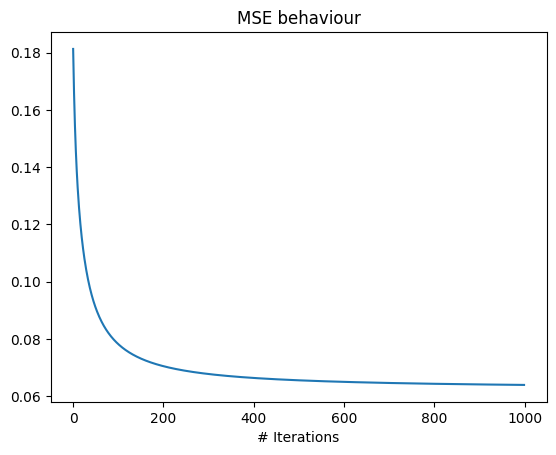

In [ ]:
plt.figure()
plt.plot(range(num_iters), mse, label="MSE")
plt.xlabel("# Iterations")
plt.title("MSE behaviour")
plt.show()

You should see the error going down pretty quickly in the beginning and then slowing down.

### Batch training

With real scenarios it is inefficient to handle each example individually. Our whole dataset can be forward propagated without a for loop:

In [ ]:
y_out = sigma(np.dot(X, W))
print("y_out =", y_out)

y_out = [[0.95164153]
 [0.99678581]
 [0.05966936]
 [0.5       ]]


so we will get the corresponding output (each value in `y_out`) for each input (each row in `X`) in single matrix multiplication.  The error and weight updates can all be calculated in a single go, using matrix multiplications similarly to the steps we did above with single vectors.

However, in these exercises you can (but you do not have to) stick to looping over one sample at a time, as we will deal with the batch training mode in the next homeworks and in this case it does not lead to any significant speed advantage.

## Exercise 1.2: 2D XOR Problem

Now let's try a slightly more difficult example. It is a 2D variant of the XOR problem, in which we lay points in a 2D space ideally reproducing the output of the logical function XOR. Here's a visualization of the points in 2D:

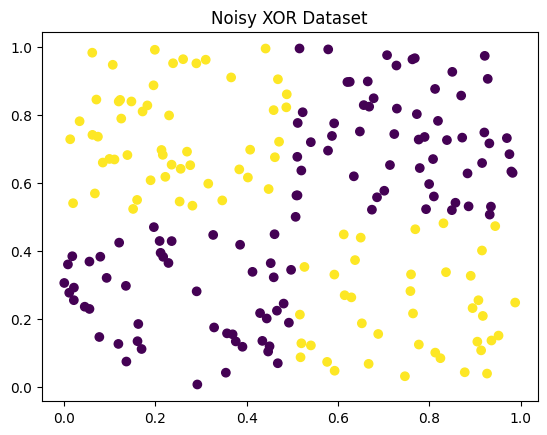

In [ ]:
rng = np.random.default_rng(seed=[42,2])

def flip(p=0.1):
  if rng.random() < p:
    return True
  return False

def XOR_data_generator(n):
  data = rng.random(size=(n, 2))
  clusters = {(0.25, 0.25):0, (0.25, 0.75):1,
              (0.75, 0.25):1, (0.75, 0.75):0}
  labels = [0 for _ in range(n)]
  for idx, p in enumerate(data):
    max = 0
    for c in clusters:
      distance = np.sum(np.power((p - np.array(c)), 2))
      if distance > max:
        labels[idx] = clusters[c]
        max = distance
    if flip():
      labels[idx] = np.abs(labels[idx])
  return data, np.array(labels).reshape(-1, 1)

X, y = XOR_data_generator(200)

plt.title("Noisy XOR Dataset")
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

Recall that the XOR function has the following truth table:

||Input|    Output|
|:----:|:---:|---:|
| 0    | 0   | 1  |
| 0    | 1   | 0  |
| 1    | 0   | 0  |
| 1    | 1   | 1  |

You can see how points above and below `0.5` on each axis can be interpreted as "true" or "false" values, respectively.

This problem is interesting because it can not be solved by using a single layer perceptron. Indeed, you will need (at least) a two-layer network to solve it (if this not obvious to you, revise the class material, think about it and come back later!).

We will now visually represent the classification boundary that a perceptron learns when we try to fit it to these data points, and observe that—expectedly—it does not separate the two classes.


### Single-Layer MLP

In [ ]:
rng = np.random.default_rng(seed=[42,3])

# Weights initialization
W = 2 * np.random.random((2,1)) - 1

# Activation function
def sigma(x):
    return 1 / (1 + np.exp(-x) )

In [ ]:
num_iters = 1000
learning_rate = 0.1

for it in range(num_iters):
    for n in range(len(X)):
        x_n = np.reshape(X[n], (2,1))
        y_target = y[n]

        # Forward propagation
        y_out = sigma(np.dot(W.T, x_n))
        err = (y_out - y_target).item()

        # Compute the gradient
        grad = err*y_out*(1 - y_out)

        # Calculate the weights update
        W_delta = -learning_rate * grad * x_n

        # Update the weights
        W += W_delta

    if it % 10 == 0: # Print every 10 epochs
      print(f"Iteration {it} -- Loss: {err:.6f}")

Iteration 0 -- Loss: 0.488048
Iteration 10 -- Loss: 0.450964
Iteration 20 -- Loss: 0.453682
Iteration 30 -- Loss: 0.454700
Iteration 40 -- Loss: 0.455130
Iteration 50 -- Loss: 0.455324
Iteration 60 -- Loss: 0.455415
Iteration 70 -- Loss: 0.455459
Iteration 80 -- Loss: 0.455480
Iteration 90 -- Loss: 0.455490
Iteration 100 -- Loss: 0.455495
Iteration 110 -- Loss: 0.455497
Iteration 120 -- Loss: 0.455499
Iteration 130 -- Loss: 0.455499
Iteration 140 -- Loss: 0.455499
Iteration 150 -- Loss: 0.455500
Iteration 160 -- Loss: 0.455500
Iteration 170 -- Loss: 0.455500
Iteration 180 -- Loss: 0.455500
Iteration 190 -- Loss: 0.455500
Iteration 200 -- Loss: 0.455500
Iteration 210 -- Loss: 0.455500
Iteration 220 -- Loss: 0.455500
Iteration 230 -- Loss: 0.455500
Iteration 240 -- Loss: 0.455500
Iteration 250 -- Loss: 0.455500
Iteration 260 -- Loss: 0.455500
Iteration 270 -- Loss: 0.455500
Iteration 280 -- Loss: 0.455500
Iteration 290 -- Loss: 0.455500
Iteration 300 -- Loss: 0.455500
Iteration 310 -- Lo

In [ ]:
def Classifier_plotter(X, y, m):
  scale = np.max(X, axis=0)[0]
  line = np.array([[0, 0], [scale, m*scale]])
  plt.plot(line[:,0], line[:,1], label=" MLP Classification Boundary")

  plt.scatter(X[:,0], X[:,1], c=y)
  plt.xlim([-0.05,1.05])
  plt.ylim([-0.05,1.05])
  plt.legend()
  plt.show()

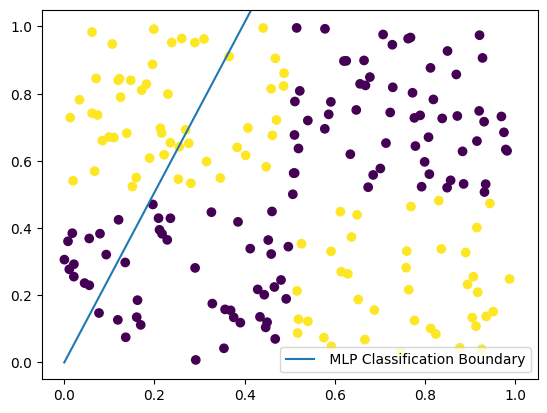

In [ ]:
m = -W[0][0] / W[1][0]
Classifier_plotter(X, y, m)

### Q3: Two-Layer MLP [TO COMPLETE]
We will now define a 2-layer feedforward network with a nonlinear activation, which will be able to represent the data points in a different 2D space in which they are linearly separable, and learn a classification boundary in that space.

Once again, we will visually represent the data points in the new 2D space and the learned classification boundary. Notice that, to simplify the visualization of the datapoints in the new space, we will have just 2 nodes in the hidden layer.

In [ ]:
num_hidden = 2
rng = np.random.default_rng(seed=[42,5])

# initialize weights randomly with zero mean and uniformly distributed values in [-1,1]
W_1 = 2 * rng.random((2,num_hidden)) - 1
W_2 = 2 * rng.random((num_hidden,1)) - 1

`%STARTCODE`

In [ ]:
num_iters = 2000
learning_rate = 0.1 # learning rate

mse = np.zeros(num_iters)

for it in range(num_iters):
    for n in range(len(X)):
        x_n = np.reshape(X[n], (2,1))
        y_target = y[n].item()

        # Forward propagation
        # Calculate h
        h = sigma(np.dot(W_1.T, x_n))

        # Calculate y_out
        y_out = sigma(np.dot(W_2.T, h)).item()

        # Let's keep track of the sum of squared errors
        mse[it] += np.square(np.subtract(y_target, y_out)) # TO COMPLETE

        # Compute the gradient
        grad = (y_out - y_target) * y_out * (1 - y_out) # TO COMPLETE

        W_2_delta = -learning_rate * grad * h

        # Calculate the weight updates for W_1
        # hint: you can either do this in parallel with vectorized operations,
        # or by performing a for loop over i (hidden nodes)
        # and k (input nodes) and calculate each W_1_ik update separately
        # TO COMPLETE
        W_1_delta = np.zeros((num_hidden, len(x_n))) # Optional to initialize the matrix

        grad_1 = ((y_out - y_target) * ((y_out * (1 - y_out)) * (W_2 * (h * (1-h)))) * x_n.T).T
        W_1_delta = -learning_rate * grad_1

        # Update the weights, note: it's important the W weights are updated at the end,
        # the above calculation should be done with the old weights
        W_1 += W_1_delta # TO COMPLETE
        W_2 += W_2_delta # TO COMPLETE

    # Divide by the number of elements to get the mean of the squared errors
    mse[it] /= len(X)

    if it % 10 == 0:
      print(f"Iteration {it} -- Loss: {mse[it]:.6f}")

Iteration 0 -- Loss: 0.247230
Iteration 10 -- Loss: 0.246917
Iteration 20 -- Loss: 0.246587
Iteration 30 -- Loss: 0.246194
Iteration 40 -- Loss: 0.245731
Iteration 50 -- Loss: 0.245200
Iteration 60 -- Loss: 0.244608
Iteration 70 -- Loss: 0.243967
Iteration 80 -- Loss: 0.243286
Iteration 90 -- Loss: 0.242562
Iteration 100 -- Loss: 0.241777
Iteration 110 -- Loss: 0.240895
Iteration 120 -- Loss: 0.239868
Iteration 130 -- Loss: 0.238637
Iteration 140 -- Loss: 0.237136
Iteration 150 -- Loss: 0.235302
Iteration 160 -- Loss: 0.233095
Iteration 170 -- Loss: 0.230513
Iteration 180 -- Loss: 0.227591
Iteration 190 -- Loss: 0.224370
Iteration 200 -- Loss: 0.220857
Iteration 210 -- Loss: 0.217027
Iteration 220 -- Loss: 0.212899
Iteration 230 -- Loss: 0.208617
Iteration 240 -- Loss: 0.204409
Iteration 250 -- Loss: 0.200470
Iteration 260 -- Loss: 0.196907
Iteration 270 -- Loss: 0.193748
Iteration 280 -- Loss: 0.190977
Iteration 290 -- Loss: 0.188560
Iteration 300 -- Loss: 0.186455
Iteration 310 -- Lo

`%ENDCODE`

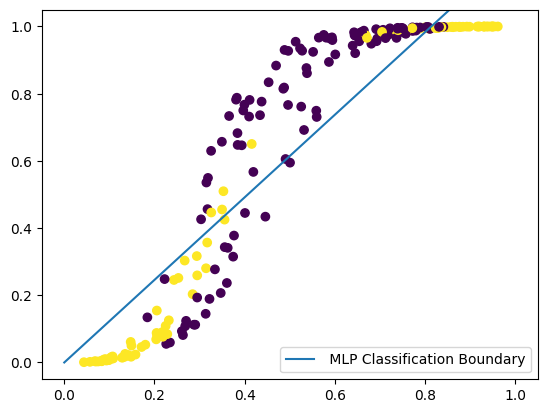

In [ ]:
X_new = sigma(np.dot(X, W_1))
m = -W_2[0][0] / W_2[1][0]
Classifier_plotter(X_new, y, m)

You should see how in the latent space the points are almost perfectly divided by the classification boundary learned by the network.

## Exercise 1.3: Handwritten digits classification
In the next two exercises we will try to apply what we learned in the previous ones in two slightly more realistic scenarios.

In particular, we now consider a simple digits classification problem. The model turns out to be similar to the perceptron implemented in Exercise 1.1, but here we will use softmax activation function and cross-entropy loss function. The idea is to create a model that has in input an image of a handwritten digit and that return a vector of 10 probabilities (one for each possible digit $0-9$).

### Dataset
The dataset that we will use in this exercise is included in [scikit-learn](https://scikit-learn.org/stable/), one of the major Machine Learning libraries. The dataset is called `load_digits` and contains several hundreds of samples. Each datapoint is made of the handwritten digit image (or rather its $8\times8$ pixel representation), that will be the input of our model, and the target digit value.

Let's start by plotting one of this handwritten digit:

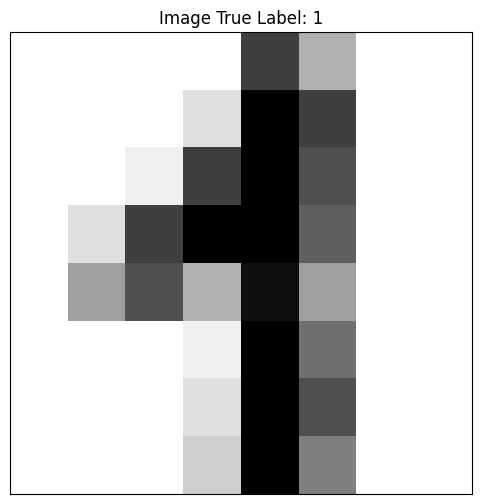

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits

digits = load_digits()

def plot_digit(x, y):
  plt.figure(figsize=(6, 6))
  plt.imshow(x, cmap=plt.cm.gray_r,
            interpolation='nearest')
  plt.title("Image True Label: %d" % y)
  plt.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
  plt.show()

sample_index = 42
plot_digit(digits.images[sample_index], digits.target[sample_index])

It is better to check how an input in the dataset $\mathbf{X}$ and its related target $\mathbf{y}$ are represented in the dataset:

In [ ]:
data = np.asarray(digits.images[sample_index], dtype='float32')
target = np.asarray(digits.target[sample_index], dtype='int32')

import sys
np.set_printoptions(threshold=sys.maxsize) # In this way we print the full array
print("X:", data)
print("y:", target)

X: [[ 0.  0.  0.  0. 12.  5.  0.  0.]
 [ 0.  0.  0.  2. 16. 12.  0.  0.]
 [ 0.  0.  1. 12. 16. 11.  0.  0.]
 [ 0.  2. 12. 16. 16. 10.  0.  0.]
 [ 0.  6. 11.  5. 15.  6.  0.  0.]
 [ 0.  0.  0.  1. 16.  9.  0.  0.]
 [ 0.  0.  0.  2. 16. 11.  0.  0.]
 [ 0.  0.  0.  3. 16.  8.  0.  0.]]
y: 1


In [ ]:
# the dataset is the flattened version of all the images ( 8 x 8 = 64 values for 1797 images)
print(digits.data.shape)

(1797, 64)


So essentialy the dataset is a matrix with the (color) values for each pixel and for each image, whereas the target is the digit itself.

#### One-hot encoding
In order to have a representation of the target that will be similar to the output of the model (i.e. $\hat{y}=0$ or $1$ for each of the 10 digits), we will use one-hot encoding. Basically, the one-hot encoding allow us to encode a categorical integer feature using a one-of-K scheme, where each class is translated to a specific index of an array.

In [ ]:
def one_hot(n_classes, y):
    return np.eye(n_classes)[y]

For example, if there are 10 classes in total and a sample belongs to class number 3, we can translate the output to the following length-ten array of 0 and 1 (class 3 is in the fourth index because we start counting from zero!):

In [ ]:
one_hot(n_classes=10, y=3)

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

As activation function we will use the Softmax function: this particular function is very useful when we have to deal with multiclassification tasks and one-hot target because it turns numbers, a.k.a. logits (pre-activations), into $m$ probabilities that sum to one. Basically, Softmax function outputs a vector that represents the probability distributions of a list of potential outcomes $j$:
$$
softmax(\mathbf{x})_j = \frac{e^{x_j}}{\sum_{i=1}^{m}{e^{x_i}}}
$$

In [ ]:
def softmax(X):
    return np.exp(X) / np.sum(np.exp(X))

### Loss Function: Cross Entropy ###
Usually, a neural network classifier that use the softmax function in the final layer is trained using Cross-Entropy as loss function:
$$H(Y,P)=-E_{y \sim Y}[log \;P(y)]$$
where $Y$ and $P$ are the true and predicted labels distributions.

In [ ]:
EPSILON = 1e-8 # this is needed for numerical stability

def cross_entropy(Y_true, Y_pred):
    Y_true, Y_pred = np.atleast_2d(Y_true), np.atleast_2d(Y_pred) # make sure the dimensions are right
    loglikelihoods = np.sum(np.log(EPSILON + Y_pred) * Y_true, axis=1)
    return -np.mean(loglikelihoods)

### Weights Initailiazation

Similarly to what we did in previous exercises, we have to initialize the weights but in this case we will consider the bias term as well. Therefore, we define the weights $\mathbf{W}\in\mathbb{R}^{m \times n}$ and the bias $\mathbf{b}\in\mathbb{R}^m$, where $n$ is the input size and $m$ is the number of classes.
Now we can define the output of our model as

$$\hat{\mathbf{y}}=softmax(\textbf{W} \textbf{x}+\mathbf{b})$$



In [ ]:
rng = np.random.default_rng(seed=[42,10])

input_size = digits.data.shape[1]
n_classes = len(np.unique(digits.target))

W = rng.uniform(size=(input_size,n_classes), high=0.1, low=-0.1) # Another way to sample from uniform distributions
b = rng.uniform(size=n_classes, high=0.1, low=-0.1)

Let's consider a sample from the training set, and plot the current output of our model before training it.

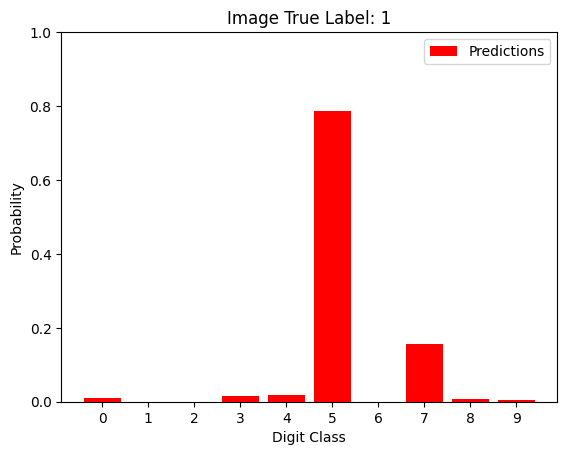

In [ ]:
def plot_predictions(y_out, true_label):
  plt.bar(range(n_classes), y_out, label="Predictions", color="red")
  plt.ylim(0, 1)
  plt.xticks(range(n_classes))
  plt.legend()
  plt.ylabel("Probability")
  plt.xlabel("Digit Class")
  plt.title("Image True Label: %d" % true_label)
  plt.show()

y_out = softmax(np.dot(digits.data[sample_index], W) + b)
plot_predictions(y_out, digits.target[sample_index])

We see that the most likely predictions for our _untrained_ model is just $5$ (or it could have been any other random guess) for the handwritten $1$.

### Q4: Training procedure [TO COMPLETE]
As in the previous exercise let's define a training procedure. Note that in this case, we have to compute the gradient according to the softmax function and the loss function that the training has to optimize.

Hence, the gradient for the weights $\textbf{W}$ is:

$\nabla_W=(\mathbf{\hat{y}}-\mathbf{y}) \cdot \mathbf{x}$

while for the bias is:

$\nabla_b=(\mathbf{\hat{y}}-\mathbf{y})$

During the training procedure let's also compute the accuracy of the predictions and the loss value at each iteration:



`%STARTCODE`

In [ ]:
num_iters = 50 # Feel free to change this
learning_rate = 0.0005 # Feel free to change this

for it in range(num_iters):
    iteration_accuracy = []
    iteration_loss = []
    for i, (X, y) in enumerate(zip(digits.data, digits.target)):

        # Complete the training loop
        # TO COMPLETE
        y_out = softmax(np.dot(X, W) + b)
        pred_err = y_out - one_hot(n_classes, y)

        # Compute the gradient and update parameters
        # TO COMPLETE
        grad_W = np.outer(pred_err, X)
        grad_b = pred_err
        W -= learning_rate * grad_W.T
        b -= learning_rate * grad_b

        iteration_accuracy.append(np.argmax(y_out) == y)
        iteration_loss.append(cross_entropy(one_hot(n_classes,y), y_out))

    print(f"Iteration: {it} -- Accuracy: {np.mean(np.asarray(iteration_accuracy)):.2%} -- Loss: {np.mean(iteration_loss):.4f}")

Iteration: 0 -- Accuracy: 82.97% -- Loss: 0.6307
Iteration: 1 -- Accuracy: 95.05% -- Loss: 0.1696
Iteration: 2 -- Accuracy: 96.49% -- Loss: 0.1305
Iteration: 3 -- Accuracy: 96.99% -- Loss: 0.1116
Iteration: 4 -- Accuracy: 97.16% -- Loss: 0.0994
Iteration: 5 -- Accuracy: 97.50% -- Loss: 0.0905
Iteration: 6 -- Accuracy: 97.66% -- Loss: 0.0834
Iteration: 7 -- Accuracy: 97.89% -- Loss: 0.0775
Iteration: 8 -- Accuracy: 98.11% -- Loss: 0.0726
Iteration: 9 -- Accuracy: 98.27% -- Loss: 0.0683
Iteration: 10 -- Accuracy: 98.50% -- Loss: 0.0646
Iteration: 11 -- Accuracy: 98.55% -- Loss: 0.0614
Iteration: 12 -- Accuracy: 98.72% -- Loss: 0.0585
Iteration: 13 -- Accuracy: 98.78% -- Loss: 0.0559
Iteration: 14 -- Accuracy: 98.94% -- Loss: 0.0536
Iteration: 15 -- Accuracy: 99.05% -- Loss: 0.0515
Iteration: 16 -- Accuracy: 99.11% -- Loss: 0.0496
Iteration: 17 -- Accuracy: 99.11% -- Loss: 0.0478
Iteration: 18 -- Accuracy: 99.11% -- Loss: 0.0463
Iteration: 19 -- Accuracy: 99.17% -- Loss: 0.0448
Iteration:

`%ENDCODE`

As you should see during the training the accuracy increases after each iteration, while the loss function value progressively declines. To succeed in the assignement, you should reach at least Accuracy$>99.00\%$ and MSE $< 0.05$.

Finally, let's check how the prediction capability of our model changes after the training:

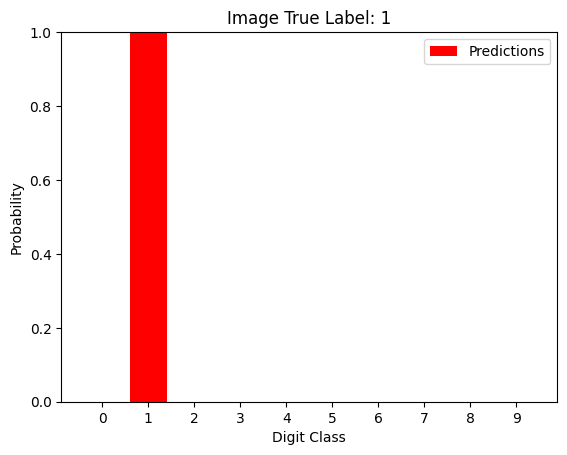

In [ ]:
y_out = softmax(np.dot(digits.data[sample_index], W) + b)
plot_predictions(y_out, digits.target[sample_index])

Now, let's test our model on custom generated images whose size are $8 \times 8$. As you can see, we can simply simulate the number drawing by considering some non-zero pixels among zero-valued pixels. For example, the following test case includes `number 2` inside, that can be seen from positions of non-zero pixel locations as well.

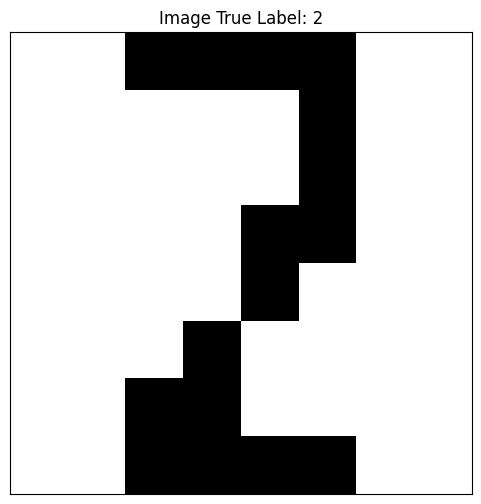

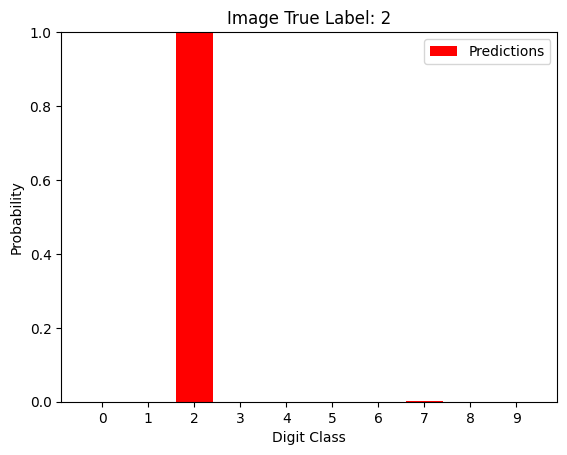

In [ ]:
test_num = 2
px = 10
test_img = np.array([
                    [0.,  0.,  px,  px, px,  px,  0.,  0.],
                    [0.,  0.,  0.,  0., 0.,  px,  0.,  0.],
                    [0.,  0.,  0.,  0., 0.,  px,  0.,  0.],
                    [0.,  0.,  0.,  0., px,  px,  0.,  0.],
                    [0.,  0.,  0.,  0., px,  0.,  0.,  0.],
                    [0.,  0.,  0.,  px, 0.,  0.,  0.,  0.],
                    [0.,  0.,  px,  px, 0.,  0.,  0.,  0.],
                    [0.,  0.,  px,  px, px,  px,  0.,  0.]
])
plot_digit(test_img, test_num)

test_img = test_img.flatten() # flatten the array to length (64, )
y_pred = softmax(np.dot(test_img, W) + b)
plot_predictions(y_pred, test_num)

You should try different numbers by changing the values in "test_img" array. You might observe and review the effect of `px` on the final estimation. Are you able to draw a number that is still recognizable for a human but not for the model?

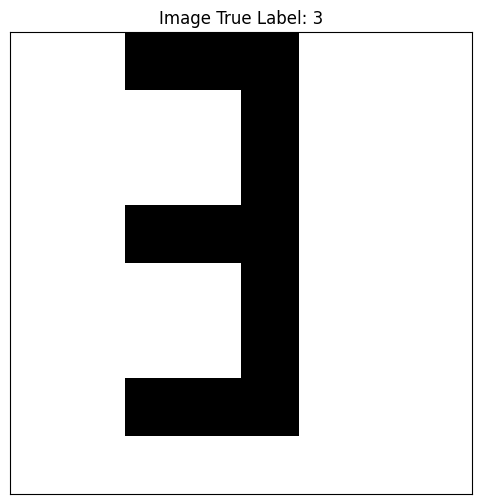

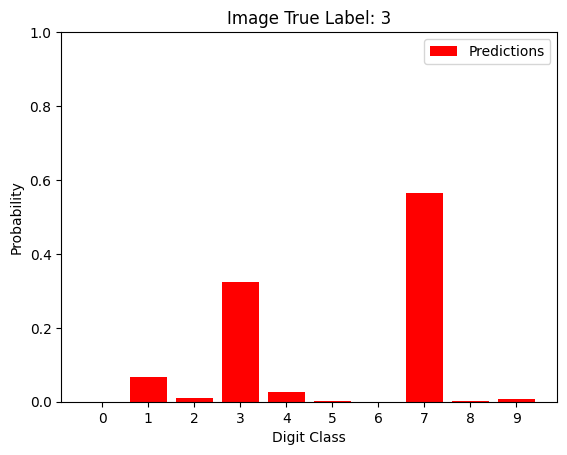

In [ ]:
test_num = 3 # [TO COMPLETE] Number you choose to draw on the test_img grid
px = 10
test_img = np.array([
                    [0.,  0.,  px,  px, px,  0.,  0.,  0.],
                    [0.,  0.,  0.,  0., px,  0.,  0.,  0.],
                    [0.,  0.,  0.,  0., px,  0.,  0.,  0.],
                    [0.,  0.,  px,  px, px,  0.,  0.,  0.],
                    [0.,  0.,  0.,  0., px,  0.,  0.,  0.],
                    [0.,  0.,  0.,  0., px,  0.,  0.,  0.],
                    [0.,  0.,  px,  px, px,  0.,  0.,  0.],
                    [0.,  0.,  0.,  0., 0.,  0.,  0.,  0.]
])
plot_digit(test_img, test_num)

test_img = test_img.flatten() # flatten the array to length (64, )
y_pred = softmax(np.dot(test_img, W) + b)
plot_predictions(y_pred, test_num)

## Exercise 1.4: Regression

In this last exercise, to showcase the versatility of Deep Learning, we are going to train a Multi-Layer Perceptron to estimate the date of first performance of Shakespearean plays based on statistics about the words used in them (fancy, isn't it?). The dataset was first presented in [this paper](https://www.semanticscholar.org/paper/Multiple-regression-techniques-for-modeling-dates-Moscato-Craig/0e32c43760b42d78758097b30c9666aaf4f779c8).

We will quickly go through it and prepare the data for you, there is no need to grasp all the details here. Your task is only to implement a 2-layer MLP model and training loop similarly to what we have done so far.

In [ ]:
# Download the Dataset

! wget https://archive.ics.uci.edu/static/public/747/181+early+modern+english+plays+transcriptions+of+early+editions+in+tei+encoding.zip
! unzip -f /content/181+early+modern+english+plays+transcriptions+of+early+editions+in+tei+encoding.zip

--2024-04-02 08:08:15--  https://archive.ics.uci.edu/static/public/747/181+early+modern+english+plays+transcriptions+of+early+editions+in+tei+encoding.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘181+early+modern+english+plays+transcriptions+of+early+editions+in+tei+encoding.zip.2’

181+early+modern+en     [ <=>                ] 870.30K  --.-KB/s    in 0.07s   

2024-04-02 08:08:15 (11.4 MB/s) - ‘181+early+modern+english+plays+transcriptions+of+early+editions+in+tei+encoding.zip.2’ saved [891188]

Archive:  /content/181+early+modern+english+plays+transcriptions+of+early+editions+in+tei+encoding.zip


In [ ]:
# Load the dataset with Pandas and shuffle its rows.

import pandas as pd

df = pd.read_csv('/content/181_plays_1585-610_t.csv') # Adjust path if you are not using Colab
df = df.sample(frac=1, random_state=42)
df.head()

,Date of first performance (best guess),the,and,i,of,a,you,my,is,to[infinitive],...,zones,zontes,zoons,zot,zoyas,zoylous,zucone,zula,zulziman,zygne
19,1608,667,719,359,491,225,203,355,196,278,...,0,0,0,0,0,0,0,0,0,0
42,1600,436,502,632,255,223,262,414,274,268,...,0,0,0,0,0,0,0,0,0,0
153,1607,547,425,545,320,469,186,260,321,184,...,0,0,0,0,0,0,0,0,0,0
78,1592,699,738,503,404,224,251,471,288,271,...,0,0,0,0,0,0,0,0,0,0
145,1610,881,477,506,630,404,304,465,278,317,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Extracting X and y from the Pandas DataFrame

X = np.array(df.iloc[:, 1:])
y = np.array(df["Date of first performance (best guess)"]).reshape(-1,1)
X.shape, y.shape

((181, 51256), (181, 1))

In [ ]:
# Making into training and test splits with 85%-15% proportions. We will see later on how to use the validation set too.

tr, tst = 0.85, 0.15
n = int(len(df) * tr)
X_train, X_test = X[:n, :], X[n:, :]
y_train, y_test = y[:n], y[n:]

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((153, 51256), (28, 51256), (153, 1), (28, 1))

### Data pre-processing

To obtain meaningful performances with a basic MLP, we have to translate our tabular data into numerical vectors. Try to understand what each functions does, as these pre-processing steps are common practices in Data Science.

In [ ]:
"""
Rescale training data in the interval [0, 1] and get the min and
max coefficients to rescale also validation and test data based on
the statistics of the training set, without leaking information.
"""
def fit_normalize(array, coeff1=1.0, coeff2=1.0):
  minimum, maximum = coeff1*np.min(array), coeff2*np.max(array)
  if minimum == maximum == 0: return (array, (0, 0))
  scaled_array = (array - minimum) / (maximum - minimum)
  return (scaled_array, (minimum, maximum))

"""
Function to rescale test data based on the statistics of the training set.
"""
def apply_normalize(array, param):
  if param[0] == param[1] == 0: return array
  scaled_array = (array - param[0]) / (param[1] - param[0])
  return scaled_array

"""
Reverse function, to go from values in [0, 1] back to years.
"""
def reverse(array, params):
  return params[0] + array * (params[1] - params[0])

In [ ]:
X_train_scaled = np.zeros_like(X_train, dtype=float)
X_train_params = []
for idx, col in enumerate(X_train.T):
  X_train_scaled[: , idx], param = fit_normalize(col)
  X_train_params.append(param)

In [ ]:
X_test_scaled = np.zeros_like(X_test, dtype=float)
for idx, col in enumerate(X_test.T):
  X_test_scaled[: , idx] = apply_normalize(col, X_train_params[idx])

In [ ]:
y_train_scaled, y_train_params = fit_normalize(y_train)
y_test_scaled = apply_normalize(y_test, y_train_params)

We aslo apply [Principal Component Analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis?) to lower the dimensionality well below $51256$ while retaining the core of the data structure.

In [ ]:
from sklearn.decomposition import PCA
n_components = 100
pca = PCA(n_components=n_components)
X_train_scaled = pca.fit_transform(X_train_scaled)
X_test_scaled = pca.transform(X_test_scaled)

In [ ]:
X_train_scaled.shape, X_test_scaled.shape, y_train_scaled.shape, y_test_scaled.shape

((153, 100), (28, 100), (153, 1), (28, 1))

### Q5: Training Procedure [TO COMPLETE]

You will now have to implement a 2-layers MLP and its training loop.
 **Your goal is to reach a MSE on the test set below $0.03$**. There are many choices to make and tests to run, so do not worry if you do not get immediately this score! Please use the variable names and basic structure we provide, for all the rest you are free to experiment and try different approaches. We will see during the course and in the next homeworks how we can implement better and faster models, leveraging Deep Learning libraries.

`%STARTCODE`

In [ ]:
rng = np.random.default_rng([42, 100])

num_hidden = 5 # TO COMPLETE (the higher the better, but more computationally expensive and leads to overfitting)

# initialize weights randomly with zero mean and uniformly distributed values in [-1,1]
W_1 = 2 * rng.random((n_components,num_hidden)) - 1 # TO COMPLETE
W_2 = 2 * rng.random((num_hidden,1)) - 1 # TO COMPLETE

# Let us define a helper lambda function to make predictions for validation and testing
forward_propagation = lambda x,w1,w2 : sigma(np.dot(sigma(np.dot(x, w1)), w2))

In [ ]:
X = X_train_scaled
y = y_train_scaled

train_losses = []
test_losses = []

num_iters = 2000 # TO COMPLETE
learning_rate = 0.3 # TO COMPLETE
mse = np.zeros(num_iters)
for it in range(num_iters):
    for n in range(len(X)):
        x_n = np.reshape(X[n], (n_components,1))
        y_target = y[n].item()
        # TO COMPLETE
        h = sigma(np.dot(W_1.T, x_n))
        y_out = forward_propagation(x_n.T, W_1, W_2)
        mse[it] += np.square(np.subtract(y_target, y_out))

        grad_2 = (y_out - y_target) * y_out * (1 - y_out)
        W_2_delta = -learning_rate * grad_2 * h

        grad_1 = ((y_out - y_target) * ((y_out * (1 - y_out)) * (W_2 * (h * (1-h)))) * x_n.T).T
        W_1_delta = -learning_rate * grad_1

        # Compute grad_W_1 and W_1_delta
        # ...
        # Update the weights
        W_1 += W_1_delta
        W_2 += W_2_delta


    mse[it] /= len(X)

    y_test_scaled_pred = forward_propagation(X_test_scaled, W_1, W_2)
    test_mse = np.mean(np.square(y_test_scaled_pred - y_test_scaled))

    train_losses.append(mse[it])
    test_losses.append(test_mse)
    if it % 2 == 0:
      print(f"Iteration {it} -- train_loss: {mse[it]:.4f} -- test_loss {test_mse:.4f}")

<ipython-input-47-e723a72414b2>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mse[it] += np.square(np.subtract(y_target, y_out))


Iteration 0 -- train_loss: 0.0933 -- test_loss 0.0779
Iteration 2 -- train_loss: 0.0740 -- test_loss 0.0695
Iteration 4 -- train_loss: 0.0706 -- test_loss 0.0644
Iteration 6 -- train_loss: 0.0672 -- test_loss 0.0587
Iteration 8 -- train_loss: 0.0632 -- test_loss 0.0519
Iteration 10 -- train_loss: 0.0583 -- test_loss 0.0442
Iteration 12 -- train_loss: 0.0518 -- test_loss 0.0369
Iteration 14 -- train_loss: 0.0454 -- test_loss 0.0318
Iteration 16 -- train_loss: 0.0410 -- test_loss 0.0285
Iteration 18 -- train_loss: 0.0378 -- test_loss 0.0266
Iteration 20 -- train_loss: 0.0338 -- test_loss 0.0252
Iteration 22 -- train_loss: 0.0317 -- test_loss 0.0242
Iteration 24 -- train_loss: 0.0303 -- test_loss 0.0229
Iteration 26 -- train_loss: 0.0282 -- test_loss 0.0222
Iteration 28 -- train_loss: 0.0258 -- test_loss 0.0221
Iteration 30 -- train_loss: 0.0246 -- test_loss 0.0221
Iteration 32 -- train_loss: 0.0238 -- test_loss 0.0220
Iteration 34 -- train_loss: 0.0217 -- test_loss 0.0214
Iteration 36 --

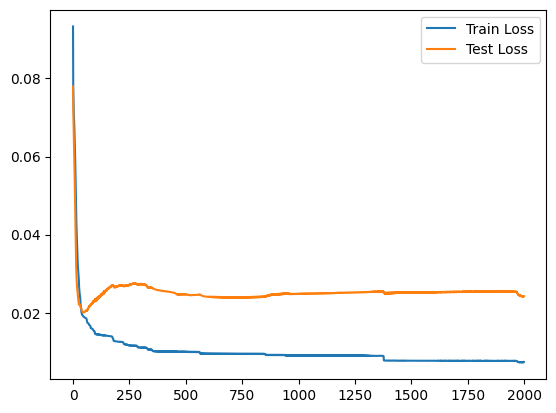

In [ ]:
# Plot results
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.legend()
plt.show()

In [ ]:
y_test_scaled_pred = forward_propagation(X_test_scaled, W_1, W_2)
y_test_pred = reverse(y_test_scaled_pred, y_train_params)

# Let's check whether you did all good!
success = test_mse < 0.03
print(f"Test MSE = {test_mse}, < 0.03? {success}")

# Finally, let us compare our predicted years with the ground truth
report = pd.DataFrame(None)
report["y_test"] = y_test.reshape(-1, )
report["y_test_pred"] = y_test_pred
report.head()

Test MSE = 0.02421773945526941, < 0.03? True


,y_test,y_test_pred
0,1604,1604.089910
1,1601,1606.858290
2,1602,1598.487883
3,1598,1603.818186
4,1588,1588.249659


`%ENDCODE`